![header](https://i.imgur.com/I4ake6d.jpg)


# COPERNICUS MARINE SERVICE : Marine Data 4 Ocean Health

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Ocean Variables and Their Impacts on Mediterranean Coral Reefs  </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***



# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. Set up Python](#2.-Set-up-Python)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data](#3.-Data)
    - [3.1 Presentation of the product used](#3.1-Presentation-of-the-product-used)
    - [3.2 Accessing the data : the Copernicus ToolBox](#3.2-Accessing-the-data-:-the-Copernicus-ToolBox)
- [4. Correlation between CO2 partial pressure and sea water acidification](#4.-Correlation-between-CO2-partial-pressure-and-sea-water-acidification)
- [5. Heatwaves and coral mortality](#5.-Heatwaves-and-coral-mortality)
    - [5.1 Mass mortality data](#5.1-Mass-mortality-data)
    - [5.2 Computing heatwave events](#5.2-Computing-heatwave-events)
- [6. Exercises](#6.-Exercises)
- [7. Conclusion](#7.-Conclusion)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


Coral reefs are among the most biologically diverse and ecologically significant ecosystems on the planet. These underwater structures serve as habitats for countless marine species, protect coastlines from erosion and storm surges, and support millions of people through fisheries and tourism. Coral reefs are not only hotspots of marine biodiversity but also play a critical role in global carbon cycling and ocean health. However, their sensitivity to environmental changes makes them particularly vulnerable to the impacts of global warming.

The effects of global warming on coral reefs are profound and multifaceted. Rising sea temperatures are one of the most significant threats, leading to widespread coral bleaching. This phenomenon occurs when corals expel the algae (zooxanthellae) that live within their tissues, depriving them of their primary energy source and leaving them weakened. Additionally, ocean acidification, driven by the absorption of excess atmospheric CO₂, reduces the availability of carbonate ions necessary for coral skeleton formation. Other climate-related stressors, such as stronger storms and changing sea levels, further threaten the structural integrity and biodiversity of coral reef ecosystems.

Advances in monitoring technologies have become indispensable for assessing and addressing these challenges. Climate and oceanographic models allow researchers to predict how changing environmental conditions will impact coral reefs, offering valuable insights for conservation planning. Meanwhile, remote sensing technologies, including satellite imagery and drones, provide large-scale, high-resolution data on reef health. In this tutorial, we will analyze some parameters in the the Mediterranean Sea. 



| <img src="./img/red_coral.jpg" width="600"></center> | 
|:--:| 
| Red Coral in the Mediterranean Sea - [phys.org](https://phys.org/news/2020-02-red-coral-effectively-recovers-mediterranean.html) |


    
# 2. Set up Python

[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays.|
|**pandas**| [Pandas](https://pandas.pydata.org/docs/) is a powerful package to manage with data tables.|
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **scipy** | [SciPy](https://scipy.org/) is an open-source Python library used for scientific and technical computing, providing tools for mathematics, statistics, optimization, and signal processing, making it essential for data analysis and complex computations. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
| **datetime** |[Datetime](https://docs.python.org/3/library/datetime.html) supplies classes for manipulating dates and times |



In [2]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime
import pandas as pd
import os

from scipy.stats import linregress, pearsonr
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 3. Data

[Go back to the "Table of contents"](#Table-of-contents)

## 3.1 Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


We will derive the ph and CO2 variables from a reanalysis product from the CMEMS catalogue : [Mediterranean Sea Biogeochemistry Reanalysis](https://data.marine.copernicus.eu/product/MEDSEA_MULTIYEAR_BGC_006_008/description).

This reanalysis is based on the MedBFM3 model system. Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. This dataset provides daily, monthly and yearly values for several biogeochemistry variables, including ph, CO2 surface partial pressure, and concentrations of diverse nutrients (phosphate, nitrate, etc).

The table below summarizes the main characteristics of the dataset :

| Parameter | Value |
| :---: | :---|
| **Variables used** | ph, spco2 |
| **Product identifier** |[MEDSEA_MULTIYEAR_BGC_006_008](https://data.marine.copernicus.eu/product/MEDSEA_MULTIYEAR_BGC_006_008/description) |
| **Spatial resolution** | 0.042° × 0.042° km |
| **Temporal resolution** | Daily, Monthly, Yearly |
| **Temporal coverage** | 1 Jan 1999 to 1 Aug 2024 |


<center><img src="./img/med_product.png" width="300"></center>


In our case, we will only download **monthly** data. It will allow us to study the trends across the 25 years of data available, while maintaining manageable file sizes.

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://documentation.marine.copernicus.eu/PUM/CMEMS-MED-PUM-006-008.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://documentation.marine.copernicus.eu/QUID/CMEMS-MED-QUID-006-008.pdf)


## 3.2 Accessing the data : the Copernicus ToolBox

[Go back to the "Table of contents"](#Table-of-contents)


The [Copernicus Marine Toolbox](https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introductionis) a new free tool that allows users to explore product metadata information, subset datasets, and download original files from producers, all without quotas. The procedure of downloading Copernicus Marine products is explained in details [here](https://help.marine.copernicus.eu/en/collections/9054839-main-functionalities). The data needed for the training is entirely downloadable using the following Python cells.

In this section, we will show you the downloading process of the Sea-Ice product by subsetting a specific region, variable, and period of time with the help of [subset](https://help.marine.copernicus.eu/en/articles/8283072-copernicus-marine-toolbox-api-subset) function of the Toolbox.

First, we import the Toolbox. Make sure to have activated the pre-installed CMEMS Python Kernel v4, which contains the Toolbox library. You can select it by clicking at the top right hand corner of this window.

<center><img src="./img/py_kernel.png" width="300"></center>

In [37]:
import copernicusmarine

The subset function is designed to facilitate easy access and manipulation of Copernicus Marine data by retrieving only the relevant information. Let's define the subsetting parameters of a request. We will define the lon/lat box in which we will retrieve the data, and then focus on the ph for a first request, and on the CO2 partial pressure for a second request. We have to use separate requests because the dataset IDs corresponding to the variables are different. If both variables were covered by the same dataset ID, retrieving them with a single request would have been possible. Upon the execution of the following cell, you have to provide your credentials from the Copernicus Marine Data Store portal. The metadata of the requested subset will be also given to you so you can verify if it is correct.

In [3]:
# In this sell, we define the boundaries of our area of interest

lat_min = 41.2
lat_max = 41.4
lon_min =  9.1
lon_max = 9.3

In [77]:
# Downloading Sea Ice Concentration and Thickness
copernicusmarine.subset(
  dataset_id="med-ogs-car-rean-m",
  variables=["ph"],
  minimum_longitude=lon_min,
  maximum_longitude=lon_max,
  minimum_latitude= lat_min,
  maximum_latitude= lat_max,
  start_datetime="1999-01-01T00:00:00",
  end_datetime="2021-12-31T23:59:59",
  minimum_depth=0,
  maximum_depth=25,
  output_filename = "CMEMS_MED_bgc_Reanalysis_ph_1999-2021.nc",
  output_directory = "data"
)

username:

  ahomerin


password:

  ················


INFO - 2024-12-09T12:57:39Z - Dataset version was not specified, the latest one was selected: "202105"
INFO - 2024-12-09T12:57:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-12-09T12:57:39Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-12-09T12:57:40Z - Downloading using service arco-time-series...
INFO - 2024-12-09T12:57:40Z - <xarray.Dataset> Size: 251kB
Dimensions:    (depth: 9, latitude: 5, longitude: 5, time: 276)
Coordinates:
  * depth      (depth) float32 36B 1.018 3.166 5.465 7.92 ... 16.27 19.4 22.71
  * latitude   (latitude) float32 20B 41.23 41.27 41.31 41.35 41.4
  * longitude  (longitude) float32 20B 9.125 9.167 9.208 9.25 9.292
  * time       (time) datetime64[ns] 2kB 1999-01-01 1999-02-01 ... 2021-12-01
Data variables:
    ph         (time, depth, latitude, longitude) float32 248kB dask.array<chunksize=(54, 4, 5, 5), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.0
    

  Y


INFO - 2024-12-09T12:57:42Z - Writing to local storage. Please wait...


100%|██████████| 110/110 [00:00<00:00, 713.66it/s]

INFO - 2024-12-09T12:57:43Z - Successfully downloaded to data/CMEMS_MED_bgc_Reanalysis_ph_1999-2021.nc


PosixPath('data/CMEMS_MED_bgc_Reanalysis_ph_1999-2021.nc')

The ph dataset has been downloaded here : `data/CMEMS_MED_bgc_Reanalysis_ph_1999-2021.nc`.

Let's now open it to explore its structure and its variables.

In [12]:
ds = xr.open_dataset("data/CMEMS_MED_bgc_Reanalysis_ph_1999-2021.nc")
ds

<xarray.Dataset> Size: 251kB
Dimensions:    (depth: 9, latitude: 5, longitude: 5, time: 276)
Coordinates:
  * depth      (depth) float32 36B 1.018 3.166 5.465 7.92 ... 16.27 19.4 22.71
  * latitude   (latitude) float32 20B 41.23 41.27 41.31 41.35 41.4
  * longitude  (longitude) float32 20B 9.125 9.167 9.208 9.25 9.292
  * time       (time) datetime64[ns] 2kB 1999-01-01 1999-02-01 ... 2021-12-01
Data variables:
    ph         (time, depth, latitude, longitude) float32 248kB ...
Attributes:
    Conventions:               CF-1.0
    bulletin_date:             2021-03-23
    bulletin_type:             analysis
    comment:                   Please check in CMEMS catalogue the INFO secti...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    field_type:                monthly_mean_beginning_at_time_field
    institution:               OGS (Istituto Nazionale di Oceanografia e di G...
    references:                Please check in CMEMS catalogue the INFO secti...
    source:                    3DVAR-OGSTM-BFM
    title:                     Dissolved Inorganic Carbon, pH and Alkalinity ...
    copernicusmarine_version:  1.2.2

We have a "depth" dimension. We are going to average the ph data on this axis for future calculations and visualisations.

In [13]:
ds_dpth = ds.mean(dim='depth')

You can see that we only have 5 latitude and 5 longitude values, therefore visualizing the data on a map will only yield a few pixels. We have retrieved data on a very small area, in the next cell we will only draw a square around it to visualize the region we are studying. 

In [8]:
# defining broader area of interest

lat_min_2 = 41.040560279042
lat_max_2 = 43.2068531885175
lon_min_2 = 8.42830162406991
lon_max_2 = 9.74427395225594

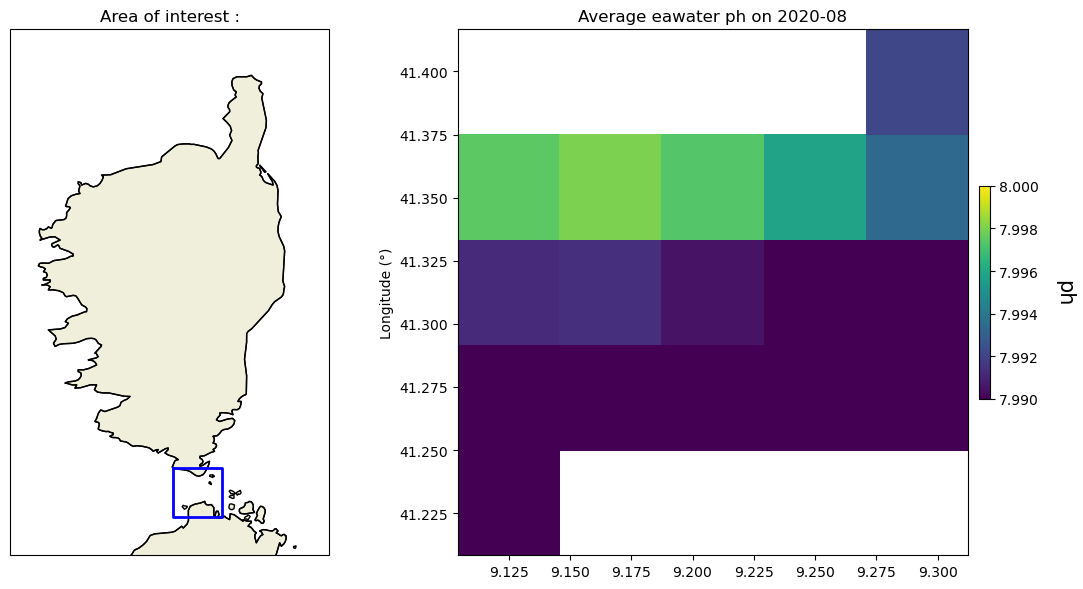

In [23]:
f = plt.figure(figsize=(12,6))                                                   # create a figure and define its size
ax = plt.subplot(121, projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines

ax.set_extent([lon_min_2, lon_max_2, lat_min_2, lat_max_2],crs=ccrs.PlateCarree())

ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min], [lat_max, lat_max, lat_min, lat_min, lat_max], 'b', linewidth = 2)
ax.set_title('Area of interest :')


date_plot = '2020-08'
temp_map = ds_dpth.sel(time=date_plot).squeeze()

ax2 = plt.subplot(122)
im = ax2.pcolor(temp_map.longitude.data, temp_map.latitude.data, temp_map.ph.data, vmin=7.99, vmax = 8)
ax2.set_ylabel('Latitude (°)')
ax2.set_ylabel('Longitude (°)')
ax2.set_title('Average eawater ph on %s' % date_plot)

cbar = f.colorbar(im, ax=ax2,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('ph', rotation=270,fontsize=15, labelpad=25) 

plt.tight_layout()

As you can, we are focused on the small detroit between Corsica and Sardinia

# 4. Correlation between CO2 partial pressure and sea water acidification

[Go back to the "Table of contents"](#Table-of-contents)


Coral reefs are highly affected by the acidification of the sea water, caused by the absoprtion of the excess atmospheric carbon dioxyde. The CMEMS catalogue enables us to monitor these variables. Let's see how they are correlated.


In [81]:
# retrieval of CO2 data.

copernicusmarine.subset(
  dataset_id="med-ogs-co2-rean-m",
  variables=["spco2"],
  minimum_longitude=lon_min,
  maximum_longitude=lon_max,
  minimum_latitude= lat_min,
  maximum_latitude= lat_max,
  start_datetime="1999-01-01T00:00:00",
  end_datetime="2021-12-31T23:59:59",
  minimum_depth=0,
  maximum_depth=25,
  output_filename = "CMEMS_MED_bgc_Reanalysis_co2_1999-2021.nc",
  output_directory = "data"
)

username:

  ahomerin


password:

  ················


INFO - 2024-12-09T12:57:59Z - Dataset version was not specified, the latest one was selected: "202105"
INFO - 2024-12-09T12:57:59Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-12-09T12:58:00Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-12-09T12:58:00Z - Downloading using service arco-time-series...
INFO - 2024-12-09T12:58:00Z - <xarray.Dataset> Size: 30kB
Dimensions:    (time: 276, latitude: 5, longitude: 5)
Coordinates:
  * latitude   (latitude) float32 20B 41.23 41.27 41.31 41.35 41.4
  * longitude  (longitude) float32 20B 9.125 9.167 9.208 9.25 9.292
  * time       (time) datetime64[ns] 2kB 1999-01-01 1999-02-01 ... 2021-12-01
Data variables:
    spco2      (time, latitude, longitude) float32 28kB dask.array<chunksize=(54, 5, 5), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.0
    bulletin_date:             2021-03-23
    bulletin_type:             analysis
    comment:           

  Y


INFO - 2024-12-09T12:58:03Z - Writing to local storage. Please wait...


100%|██████████| 26/26 [00:00<00:00, 150.63it/s]

INFO - 2024-12-09T12:58:04Z - Successfully downloaded to data/CMEMS_MED_bgc_Reanalysis_co2_1999-2021.nc


PosixPath('data/CMEMS_MED_bgc_Reanalysis_co2_1999-2021.nc')

Let's have a quick look at the CO2 dataset.

In [25]:
ds_co2 = xr.open_dataset('data/CMEMS_MED_bgc_Reanalysis_co2_1999-2021.nc')
ds_co2

<xarray.Dataset> Size: 30kB
Dimensions:    (time: 276, latitude: 5, longitude: 5)
Coordinates:
  * latitude   (latitude) float32 20B 41.23 41.27 41.31 41.35 41.4
  * longitude  (longitude) float32 20B 9.125 9.167 9.208 9.25 9.292
  * time       (time) datetime64[ns] 2kB 1999-01-01 1999-02-01 ... 2021-12-01
Data variables:
    spco2      (time, latitude, longitude) float32 28kB ...
Attributes:
    Conventions:               CF-1.0
    bulletin_date:             2021-03-23
    bulletin_type:             analysis
    comment:                   Please check in CMEMS catalogue the INFO secti...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    field_type:                monthly_mean_beginning_at_time_field
    institution:               OGS (Istituto Nazionale di Oceanografia e di G...
    references:                Please check in CMEMS catalogue the INFO secti...
    source:                    3DVAR-OGSTM-BFM
    title:                     Surface partial pressure of CO2 and Surface CO...
    copernicusmarine_version:  1.2.2

We are going to study the correlation between the **ph** and **spCO2** timeseries. To derive the timeseries, we are going to average both datasets over the latitude and longitude dimensions.

In [26]:
ds_co2_avg = ds_co2.mean(dim=['latitude', 'longitude'])
ds_dpth_avg = ds_dpth.mean(dim=['latitude', 'longitude'])


Let's compute the correlation using the *linregress* function from the **scipy** library.

In [27]:
slope, intercept, r, p, se = linregress(ds_dpth_avg.ph.data,  ds_co2_avg.spco2.fillna(50).data)
print("Slope : %f\nIntercept : %f\nCorrelation Coef : %f\nP-value : %g\nSlope Std Err : %f" %(slope, intercept, r, p, se))

trend_vals = ds_dpth_avg.ph.data*slope + intercept


Slope : -126.892936
Intercept : 1067.165848
Correlation Coef : -0.988625
P-value : 1.78841e-227
Slope Std Err : 1.166204


We can see that there is a very strong inverse correlation (coefficient very close to -1), which is consistent with the fact that more CO2 in the atmosphere leads to the acidication of the sea water (decrease of the pH). Let's visualize this :

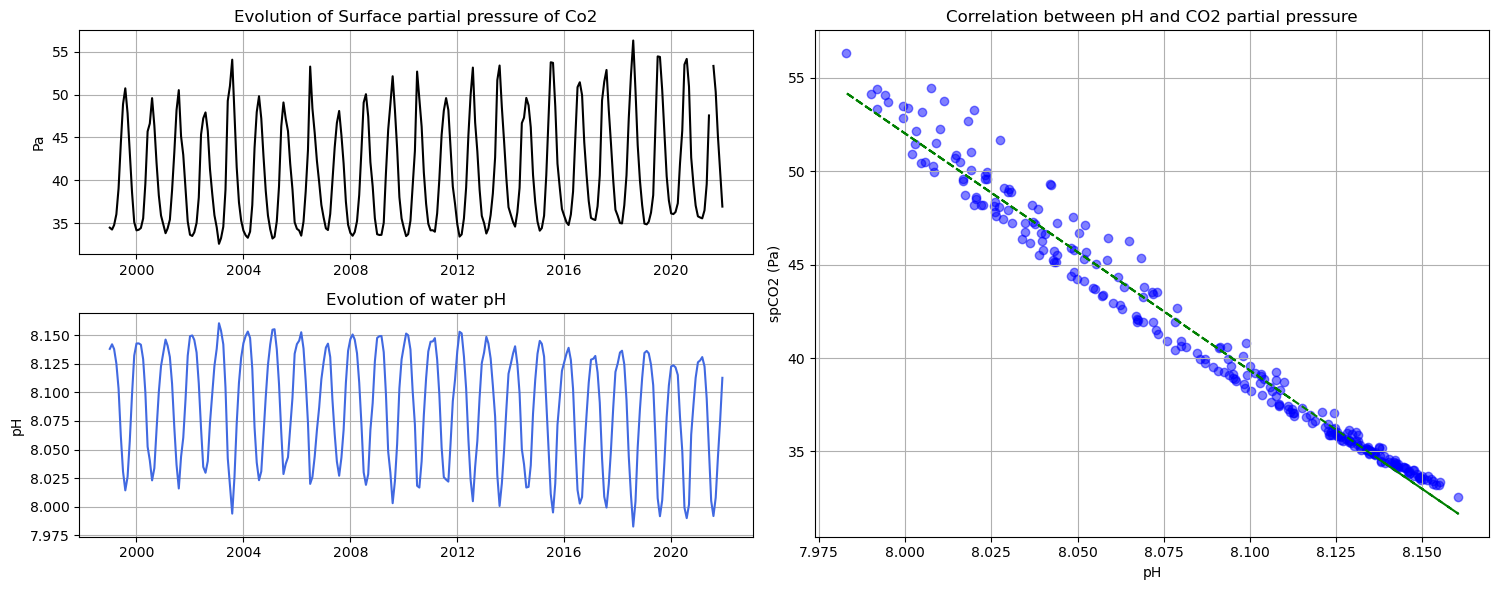

In [28]:
fig = plt.figure(figsize=(15,6))


ax1 = plt.subplot(221)
dates = ds_co2_avg.time.astype('datetime64')
ax1.plot(dates, ds_co2_avg.spco2.data, color='k')
ax1.set_title('Evolution of Surface partial pressure of Co2')
ax1.set_ylabel('Pa')
ax1.grid(True)

ax2 = plt.subplot(223)
dates = ds_dpth_avg.time.astype('datetime64')
ax2.plot(dates, ds_dpth_avg.ph.data, color="royalblue")
ax2.set_title('Evolution of water pH')
ax2.set_ylabel('pH')
ax2.grid(True)

ax3 = plt.subplot(122)
ax3.scatter(ds_dpth_avg.ph.data, ds_co2_avg.spco2.data, color='b', alpha=0.5)
ax3.plot(ds_dpth_avg.ph.data, trend_vals, color='g', linestyle='--')
ax3.set_title('Correlation between pH and CO2 partial pressure')
ax3.set_xlabel('pH')
ax3.set_ylabel('spCO2 (Pa)')
ax3.grid(True)

plt.tight_layout()

We can clearly how the data points are closed to the regression line. We can also see on the two left panels that exceptional high peaks of CO2 partial pressure, like in 2003, correspond to exceptionally low troughs of pH.

# 5. Heatwaves and coral mortality

[Go back to the "Table of contents"](#Table-of-contents)


## 5.1 Mass mortality data

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will analyse a dataset listing the mass coral mortality events recorded in the Mediterranean Sea. the data is located here : `data/coral_mortality/Mortality_Data.csv`


Dataset citation :

Garrabou, J., Bazairi, H., Espinosa, F., Ramdani, M., Grimes, S., Benabdi, M., … Rilov, G. (2018). MME-T-MEDNet: Mass mortality events in Mediterranean marine coastal ecosystems [Data set]. CSIC - Instituto de Ciencias del Mar (ICM). http://doi.org/10.20350/DIGITALCSIC/8575

Contrary to the previous datasets, we will use the **pandas** library to manipulate the data, as this library is more suitable for handling tables than **xarray**.

In [49]:
df_cor = pd.read_csv('data/coral_mortality/Mortality_Data.csv', sep=';')

df_cor.head()

,id,created_at,updated_at,year,ecoregion,province,location,country,latitude,longitude,...,meow_id,protected_area,protected_area_id,status_yr,location_mpa,published,publication_id,contact,comments,public
0,1,2018-07-06 07:02:20,2018-10-04 13:01:05,1979,Western Mediterranean,Mediterranean Sea,Port-Cros,FR,42.98000,6.39000,...,231,1,86.0,1963,Port-Cros,1,176,Full name: \ne-mail: \nweb page:,NaN,0
1,2,2018-07-06 07:02:23,2018-10-04 13:01:06,1979,Western Mediterranean,Mediterranean Sea,Port-Cros,FR,42.98000,6.39000,...,231,1,86.0,1963,Port-Cros,1,160,Full name: \ne-mail: \nweb page:,NaN,0
2,3,2018-07-06 07:02:29,2018-10-04 13:01:06,1983,Western Mediterranean,Mediterranean Sea,La Ciotat,FR,43.15000,5.61333,...,231,1,150.0,2012,Calanques,1,206,Full name: \ne-mail: \nweb page:,NaN,0
3,4,2018-07-06 07:02:36,2018-10-04 13:01:06,1983,Western Mediterranean,Mediterranean Sea,La Ciotat,FR,43.15435,5.61333,...,231,1,150.0,2012,Calanques,1,200,Full name: \ne-mail: \nweb page:,NaN,0
4,5,2018-07-06 07:02:36,2018-10-04 13:01:06,1985,Tunisian Plateau/Gulf of Sidra,Mediterranean Sea,Adjim,NaN,33.70000,10.48645,...,233,0,NaN,0,NaN,1,222,Full name: \ne-mail: \nweb page:,NaN,0


Some of the columns are masked, let's print them and perform some basic manipulations to explore the dataset :

In [57]:
print('Dataset column names :\n')
print(df_cor.columns)

# displaying temporal coverage
print('\nTemporal coverage : %d - %d' %(np.unique(df_cor.year).min(), np.unique(df_cor.year).max()))

Dataset column names :

Index(['id', 'created_at', 'updated_at', 'year', 'ecoregion', 'province',
       'location', 'country', 'latitude', 'longitude', 'even_start',
       'lower_depth', 'upper_depth', 'taxa', 'species', 'damaged_percentatge',
       'damaged_qualitative', 'individuals_surveyed', 'drivers_abiotic',
       'drivers_abiotic_other', 'drivers_biotic_group', 'drivers_biotic',
       'drivers_biotic_other', 'meow_id', 'protected_area',
       'protected_area_id', 'status_yr', 'location_mpa', 'published',
       'publication_id', 'contact', 'comments', 'public'],
      dtype='object')

Temporal coverage : 1979 - 2017


Let's have a first look at the whole dataset before focusing on Corsica :

Text(0.5, 1.0, 'Locations of mass mortality events of corals')

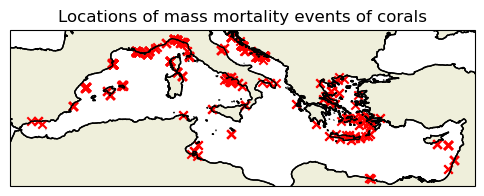

In [53]:
f = plt.figure(figsize=(6,6))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines

ax.scatter(df_cor.longitude, df_cor.latitude, c='r', marker='x')


ax.set_title('Locations of mass mortality events of corals')

There is indeed data near corsica, let's focus on the area by subsetting the dataset using our lon/lat box that we already defined :

Text(0.5, 1.0, 'Locations of mass mortality events of corals around Corsica')

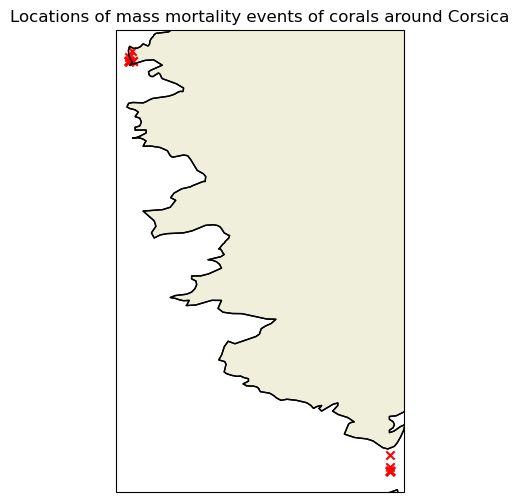

In [65]:
df_cor_roi = df_cor[(df_cor.latitude.between(lat_min_2, lat_max_2)) & (df_cor.longitude.between(lon_min_2, lon_max_2)) ]


f = plt.figure(figsize=(6,6))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines

ax.scatter(df_cor_roi.longitude, df_cor_roi.latitude, c='r', marker='x')


ax.set_title('Locations of mass mortality events of corals around Corsica');


We can now focus on the detroit we have been studying in this training :

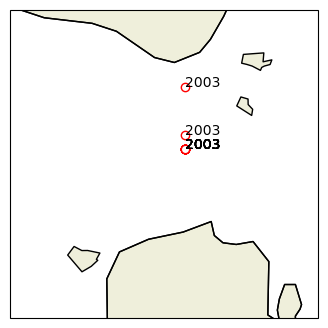

In [70]:
df_cor_roi_2 = df_cor[(df_cor.latitude.between(lat_min, lat_max)) & (df_cor.longitude.between(lon_min, lon_max)) ]


f = plt.figure(figsize=(4,4))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines

ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
ax.scatter(df_cor_roi_2.longitude, df_cor_roi_2.latitude, c='w', edgecolor='r')

for i in range(len(df_cor_roi_2)):
    ax.text(df_cor_roi_2.longitude.iloc[i], df_cor_roi_2.latitude.iloc[i], df_cor_roi_2.year.astype(str).iloc[i]);

The mass mortality events recorded in this area have all been recorded in 2003. 2003 was indeed a year of exceptionnally high temperatures, let's verify this by analysing temperature data.

## 5.2 Computing heatwave events

[Go back to the "Table of contents"](#Table-of-contents)


In the Mediterranean sea, the driver of coral mortality is the rise of sea water temperature. Marine heatwave are becoming more and more frequent, especially in this region. Let's analyze some temperature data in order to identify potential periods of high coral mortality. This time, we will retrieve **daily** data.

In [86]:
# Downloading Sea Ice Concentration and Thickness
copernicusmarine.subset(
  dataset_id="med-cmcc-tem-rean-d",
  variables=["thetao"],
  minimum_longitude=lon_min,
  maximum_longitude=lon_max,
  minimum_latitude= lat_min,
  maximum_latitude= lat_max,
  start_datetime="1991-01-01T00:00:00",
  end_datetime="2021-12-31T23:59:59",
  minimum_depth=15,
  maximum_depth=25,
  output_filename = "CMEMS_MED_phy_Reanalysis_temp_1991-2021.nc",
  output_directory = "data"
)

username:

  ahomerin


password:

  ················


INFO - 2024-12-09T12:58:27Z - Dataset version was not specified, the latest one was selected: "202012"
INFO - 2024-12-09T12:58:27Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-12-09T12:58:28Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2024-12-09T12:58:28Z - Downloading using service arco-time-series...
INFO - 2024-12-09T12:58:28Z - <xarray.Dataset> Size: 3MB
Dimensions:    (depth: 3, latitude: 5, longitude: 5, time: 11323)
Coordinates:
  * depth      (depth) float32 12B 16.27 19.4 22.71
  * latitude   (latitude) float32 20B 41.23 41.27 41.31 41.35 41.4
  * longitude  (longitude) float32 20B 9.125 9.167 9.208 9.25 9.292
  * time       (time) datetime64[ns] 91kB 1991-01-01 1991-01-02 ... 2021-12-31
Data variables:
    thetao     (time, depth, latitude, longitude) float32 3MB dask.array<chunksize=(2520, 1, 5, 5), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.0
    bulletin_date:            

  Y


INFO - 2024-12-09T12:58:31Z - Writing to local storage. Please wait...


100%|██████████| 107/107 [00:00<00:00, 728.40it/s]

INFO - 2024-12-09T12:58:33Z - Successfully downloaded to data/CMEMS_MED_phy_Reanalysis_temp_1991-2021.nc


PosixPath('data/CMEMS_MED_phy_Reanalysis_temp_1991-2021.nc')

In [29]:
ds_temp = xr.open_dataset('data/CMEMS_MED_phy_Reanalysis_temp_1991-2021.nc')
ds_temp

<xarray.Dataset> Size: 3MB
Dimensions:    (depth: 3, latitude: 5, longitude: 5, time: 11323)
Coordinates:
  * depth      (depth) float32 12B 16.27 19.4 22.71
  * latitude   (latitude) float32 20B 41.23 41.27 41.31 41.35 41.4
  * longitude  (longitude) float32 20B 9.125 9.167 9.208 9.25 9.292
  * time       (time) datetime64[ns] 91kB 1991-01-01 1991-01-02 ... 2021-12-31
Data variables:
    thetao     (time, depth, latitude, longitude) float32 3MB ...
Attributes:
    Conventions:               CF-1.0
    bulletin_date:             20200901
    bulletin_type:             reanalysis
    comment:                   Please check in CMEMS catalogue the INFO secti...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    field_type:                daily_mean_centered_at_time_field
    institution:               Centro Euro-Mediterraneo sui Cambiamenti Clima...
    references:                Please check in CMEMS catalogue the INFO secti...
    source:                    MFS E3R1
    title:                     Potential Temperature (3D) - Daily Mean
    copernicusmarine_version:  1.2.2

As corals are located underwater, we will use the temperature at 20 meters deep for this analysis. The dataset does not necessarily provide the 20 meters depth layer, so we will use the *"nearest"* method to select the closest depth layer available.

We will also average the data along the longitude and latitude dimensions to compute the spatial timeseries.

In [31]:
ds_temp_20m_avg = ds_temp.sel(depth=20, method='nearest').mean(dim=['latitude', 'longitude'])
ds_temp_20m_avg

<xarray.Dataset> Size: 136kB
Dimensions:  (time: 11323)
Coordinates:
    depth    float32 4B 19.4
  * time     (time) datetime64[ns] 91kB 1991-01-01 1991-01-02 ... 2021-12-31
Data variables:
    thetao   (time) float32 45kB 13.61 13.53 13.48 13.48 ... 14.72 14.73 14.77

The closest depth layer was at -19.4 meters !

Text(0, 0.5, '°C')

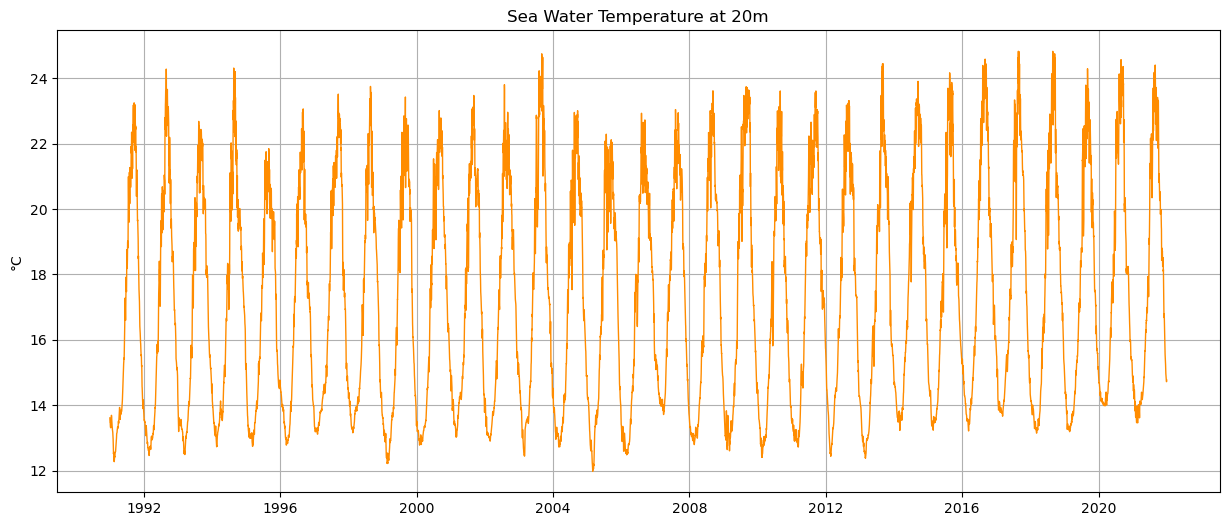

In [40]:
# timeseries visualisation :

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(ds_temp_20m_avg.time.astype('datetime64'), ds_temp_20m_avg.thetao, color='darkorange', linewidth=1)
ax.grid(True)
ax.set_title('Sea Water Temperature at 20m')
ax.set_ylabel('°C')


We are now going to compute heatwave days for each year. We will perform the following steps :
*  For each day of the year : compute the 90th percentile of the temperature values over the 30 years of data. Therefore each day of the year will have its own "exceptionnaly high temperature" threshold.
*  For each year, we will count the days that have a temperature above their threshold. Such days will be referred to as "Marine Heatwave Days".
*  Defined as such, Marine Heatwave Days may also include winter days, that have relatively high temperatures, but not high enough to cause the death of corals. Therefore we will define a second indicator : a "sublethal" threshold set at 23.5°C. Days above this threshold will also be counted.

In [71]:
# threshold computation

group = ds_temp_20m_avg.groupby('time.dayofyear')

dayofyear_90 = group.reduce(np.percentile, q=90)


In [72]:
ds_temp_20m_avg['dayofyear'] = ('time', pd.to_datetime(ds_temp_20m_avg.time.data).dayofyear)

In [73]:
years = np.arange(1991, 2022)
mhw = np.zeros(len(years))
for c, y in enumerate(years) :
    tmp = ds_temp_20m_avg.sel(time=str(y))
    for i in range(len(tmp.time.data)):
        temp_rean = tmp.thetao.data[i]
        day = tmp.dayofyear.data[i]
        temp_ref = dayofyear_90.thetao.data[day-1]
        if temp_rean > temp_ref:
            mhw[c] += 1

mhw

array([  3.,   2.,   0.,  16.,   0.,   0.,  32.,   0.,   3.,   9.,  11.,
         8.,  41.,   8.,  11.,  39., 110.,   9.,  47.,   8.,  92.,  10.,
        22., 101.,  38.,  99., 116.,  59.,  12., 133.,  57.])

In [74]:
# above 23.5°

lethal = np.zeros(len(years))
for c, y in enumerate(years) :
    tmp = ds_temp_20m_avg.sel(time=str(y))
    for i in range(len(tmp.time.data)):
        lethal[c] = (tmp.thetao.data > 23.5).sum()
lethal

array([ 0.,  8.,  0.,  6.,  0.,  0.,  1.,  4.,  0.,  0.,  0.,  2., 27.,
        0.,  0.,  0.,  0.,  1.,  8.,  1.,  4.,  0., 15.,  5., 19., 35.,
       19., 37., 10., 30., 15.])

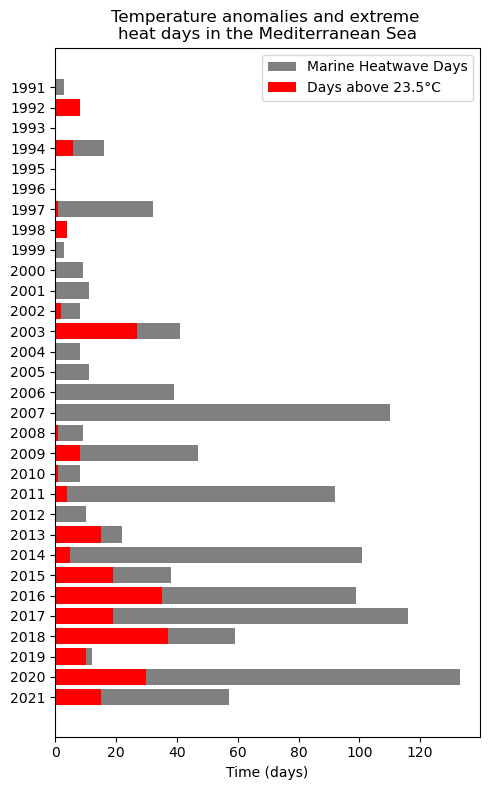

In [75]:
fig, ax = plt.subplots(figsize=(5,8))

ax.barh(years, mhw, label='Marine Heatwave Days', color='grey')
ax.barh(years, lethal, label='Days above 23.5°C', color='r')
plt.gca().invert_yaxis()
ax.set_yticks(years);
ax.set_xlabel("Time (days)")
ax.set_title('Temperature anomalies and extreme \nheat days in the Mediterranean Sea')
ax.legend()
plt.tight_layout()

As can be seen on this graph, in our area of interest, 2003 was indeed an exceptionnal year with a lot of very hot days, potentially lethal for corals. We can also see that the frequency of such heatwaves has been increasing a lot in more recent years. This shows how vulnerable the coral reefs in the Mediterranean sea are, and how likely we are to witness other similar mortality episodes in the coming years.

You have reached the end of this tutorial. Now here are a few exercises to complete the training!



# 6. Exercises

[Go back to the "Table of contents"](#Table-of-contents)


<div class="alert alert-block alert-info">  


Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions. If you need help, do not hesitate to contact the service desk: **[servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu)**!

    
**Beginners** :

- In [Section 4](#4.-Correlation-between-CO2-partial-pressure-and-sea-water-acidification), we displayed sea water pH on a very limited area. Try changing the bounds of the area of interest (lon_min, lon_max, etc) in order to display a wider visualization of sea water pH.

   
- In [Section 5.1](#5.1-Mass-mortality-data) you have learned how to subset a pandas DataFrame by latitude and longitude. You can try to subset the data using other columns, for instance, can you display only the mass mortality events that happened during the 20th century ?
    

**Intermediate** :

- We have performed this case study on Corsica, but all the datasets we used cover all of the Mediterranean Sea. Try to perform the same analysis on other locations !

- Another driver of coral mortality is the excess of nutrients from runoffs in sea-water, the [Mediterranean Sea Biogeochemistry Reanalysis](https://data.marine.copernicus.eu/product/MEDSEA_MULTIYEAR_BGC_006_008/description) product we used also contains nutrient concentrations (phosphorous, nitrate, etc). Try to see if it somehow correlates with mass mortality events in the Mediterranean Sea.
    
</div> 

# 7. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)


In this notebook, you learned to access CMEMS data through the Copernicus Marine Service ToolBox, and to explore it. You then learned to compute linear trends across spatially averaged timeseries, to perform thresholding and to manipulate pandas DataFrames.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>

And thank you for your attention! :) 
    
    
We hope you enjoyed this Jupyter Notebook training on Ocean Health.

You now have plenty of tools to analyse sea-ice variables, compute trends and draw graphs. Feel free to re-use and adapt all the Python scripts of this notebook to your needs ! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us at [servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu) !